# Data Analysis for Rayleigh Quotient Comparison

In [2]:
import numpy as np
import math 
import networkx as nx
import itertools
import time
from sage.all import *
import h5py
from matplotlib import pyplot as plt
from pathlib import Path

### Helper Functions

In [ ]:
def checkh5(fn: Path, var: T.Optional[str | list[str]] = None):
    fn = Path(fn).expanduser().resolve(strict=True)

    if var:
        if isinstance(var, str):
            var = var.split()

        for v in var:
            checkh5_var(fn, v)

        return
    # %%
    with h5py.File(fn, "r") as f:
        f.visititems(h5print)

In [3]:
def generate_diameter_3_graphs(n):
    """ Cycles through graphs on n vertices finding the ones with diameter 3 whose complements have diameter 3 and saves both.
        This generation is deterministic so we can trust the ordering for reruns.
        Parameters
        ----------
        n: int 
            Number of vertices to build the graphs from

        Returns
        -------
        Graphs: list(graphs)
            List of Sagemath graphs whose diameter is 3 and whose complement is also diameter 3
        Comps: list(graphs)
            The complement of the graphs above
    """
    Graphs, Comps = [], []
    for G in graphs(n):
        if G.diameter() == 3:
            H = G.complement()
            if H.diameter() == 3:
                Graphs.append(G)
                Comps.append(H)
    return Graphs, Comps

In [20]:
def compare_v2e_groups(hdf5_file='results/results_on_6.h5', n=6):
    """
    
    """
    Graphs, Comps = generate_diameter_3_graphs(n)

    v2e_1 = []
    v2e_2 = []
    v2e_3 = []

    with h5py.File(hdf5_file, 'r') as file:
        for i in range(len(Graphs)):
            group = file[f'Graph_{i}_on_{n}_vertices']
            v2e_map = group['v2e_map'][:]
            G_eigvec = group['G_eigvec'][:]
            DC_eigvec = group['DC_eigvec'][:]
            vec_diff = G_eigvec - DC_eigvec

            for j in range(n):
                if v2e_map[j] == 1:
                    v2e_1.append(vec_diff[j])
                elif v2e_map[j] == 2:
                    v2e_2.append(vec_diff[j])
                else:
                    v2e_3.append(vec_diff[j])

    return v2e_1, v2e_2, v2e_3

In [9]:
def plot_v2e_groups(v2e_1, v2e_2, v2e_3):
    """
    
    """
    plt.figure(figsize=(12,8))

    plt.subplot(231)
    plt.title("v2e_1 (dominating vertices)")
    plt.hist(v2e_1)

    plt.subplot(232)
    plt.title("v2e_2 (Eccentricity 2/3)")
    plt.hist(v2e_2)

    plt.subplot(233)
    plt.title("v2e_3 (x and y)")
    plt.hist(v2e_3)

    plt.subplot(234)
    plt.title("v2e_1 (dominating vertices)")
    plt.boxplot(v2e_1)

    plt.subplot(235)
    plt.title("v2e_2 (Eccentricity 2/3)")
    plt.boxplot(v2e_2)

    plt.subplot(236)
    plt.title("v2e_3 (x and y)")
    plt.boxplot(v2e_3)

    plt.tight_layout()
    plt.show()

In [17]:
results_path = '/home/seyfdall/compute/graph_theory/laplace-spread-conjecture/results/'

### Analysis on 6 Vertices

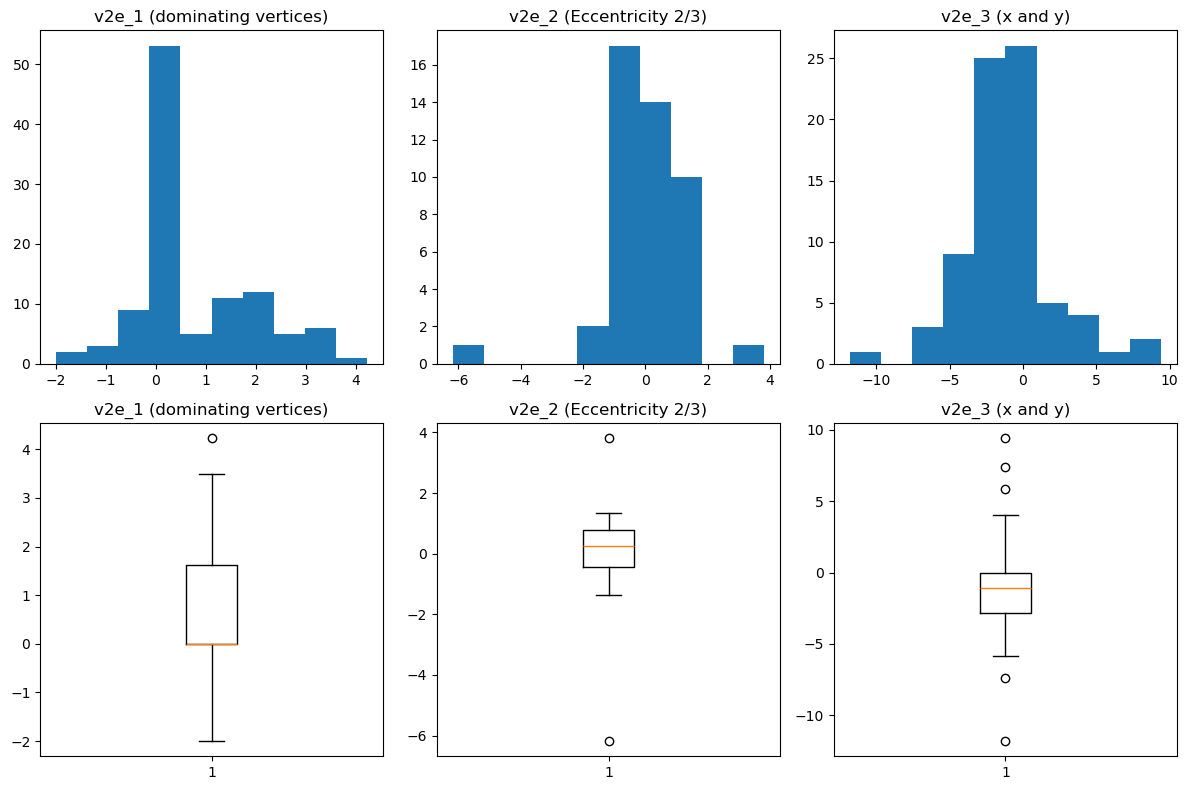

In [21]:
results_6_path = results_path + 'results_on_6.h5'
v2e_1, v2e_2, v2e_3 = compare_v2e_groups(hdf5_file=results_6_path, n=6)
plot_v2e_groups(v2e_1, v2e_2, v2e_3)

### Analysis on 7 Vertices

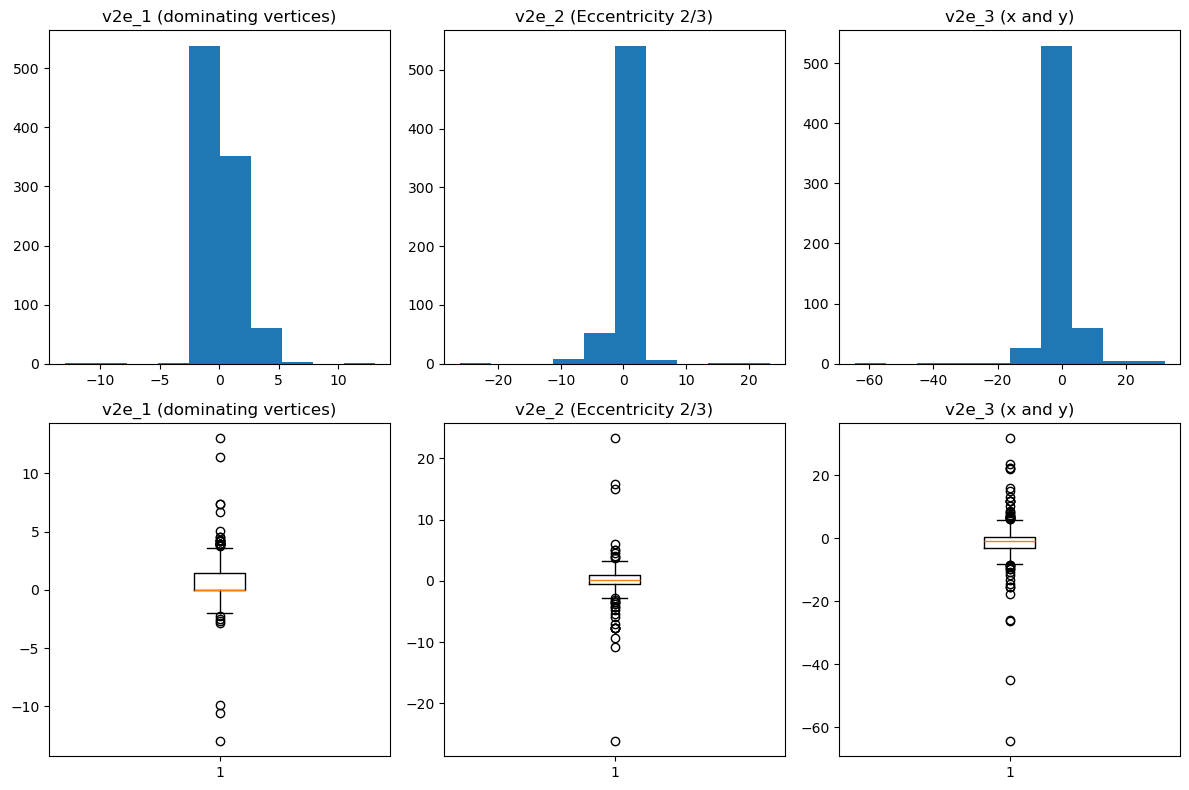

In [22]:
results_7_path = results_path + 'results_on_7.h5'
v2e_1, v2e_2, v2e_3 = compare_v2e_groups(hdf5_file=results_7_path, n=7)
plot_v2e_groups(v2e_1, v2e_2, v2e_3)

### Analysis on 8 Vertices

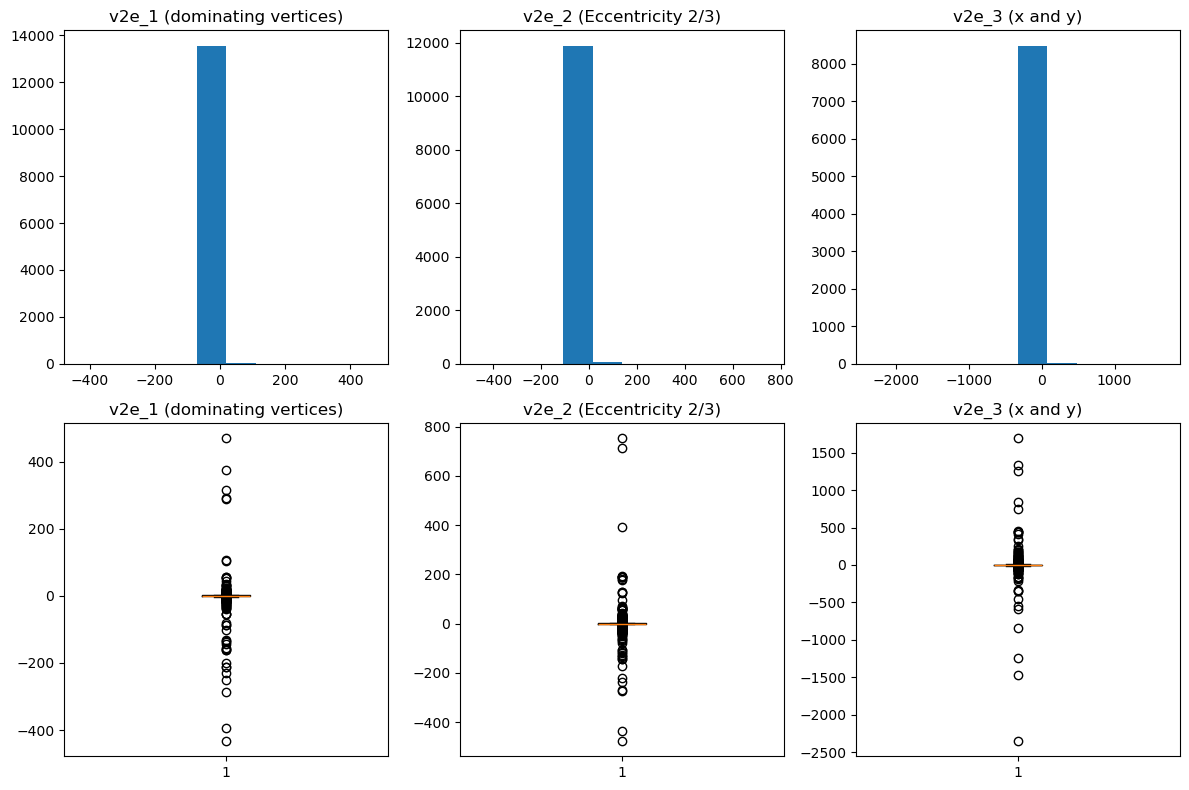

In [23]:
results_8_path = results_path + 'results_on_8.h5'
v2e_1, v2e_2, v2e_3 = compare_v2e_groups(hdf5_file=results_8_path, n=8)
plot_v2e_groups(v2e_1, v2e_2, v2e_3)

### Analysis on 9 Vertices

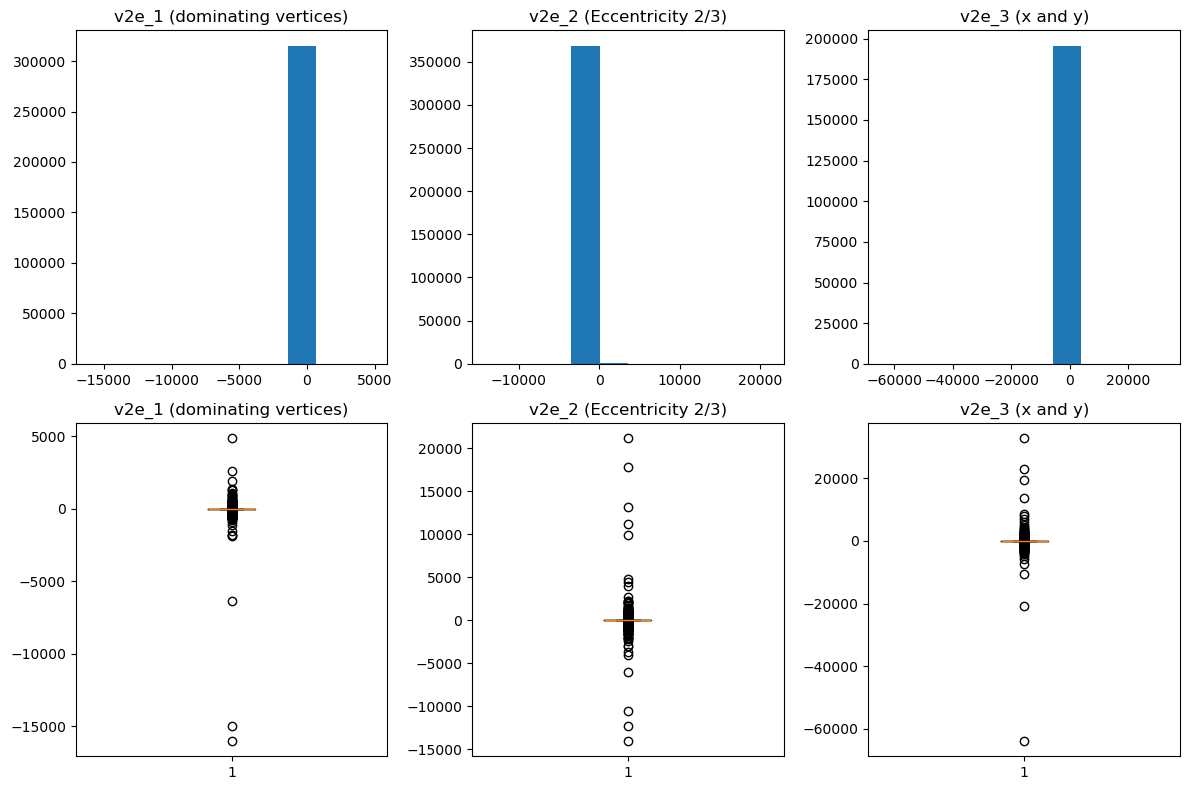

In [24]:
results_9_path = results_path + 'results_on_9.h5'
v2e_1, v2e_2, v2e_3 = compare_v2e_groups(hdf5_file=results_9_path, n=9)
plot_v2e_groups(v2e_1, v2e_2, v2e_3)